In [5]:
from os import listdir
import os.path
from snptools.count_variants_per_gene import process_vcf
from snptools.genetree import make_gene_tree

gene_tree = make_gene_tree()
locus_names = sorted([ interval.data['locus'] for interval in gene_tree ])
# print(locus_names)
input_directory = '/home/pvh/Data/vcf/tracey'
matrix = []
for filename in sorted(listdir(input_directory)):
    if filename.endswith('.vcf.gz') or filename.endswith('.vcf'):
        path = os.path.join(input_directory, filename)
        counts = process_vcf(path, gene_tree=gene_tree)
        row = [ counts.get(locus, 0) for locus in locus_names ]
        matrix.append(row)

In [6]:
import pandas as pd

In [13]:
sample_names = [ filename.split('.')[0] for filename in sorted(listdir(input_directory)) ]
data = pd.DataFrame(matrix, index=sample_names, columns=locus_names)

In [14]:
data

,Rv0001,Rv0002,Rv0003,Rv0004,Rv0005,Rv0006,Rv0007,Rv0008c,Rv0009,Rv0010c,...,Rv3915,Rv3916c,Rv3917c,Rv3918c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c
TKK-01-0007,0,0,1,0,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TKK-01-0008,0,0,1,0,0,3,0,1,0,0,...,0,0,1,0,3,0,1,0,0,0
TKK-01-0009,1,0,1,0,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import seaborn as sns

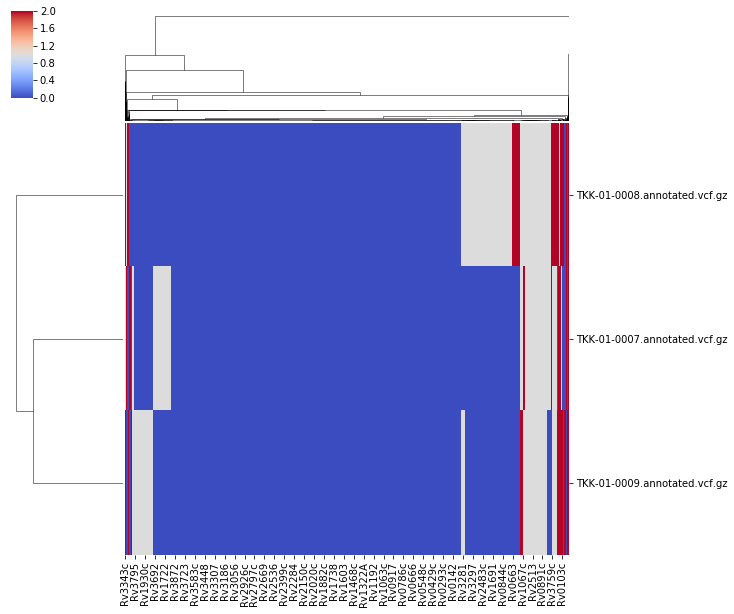

In [10]:
heatmap = sns.clustermap(data, cmap = 'coolwarm', robust=True)

In [12]:
data.max(axis=1)

TKK-01-0007.annotated.vcf.gz     97
TKK-01-0008.annotated.vcf.gz    104
TKK-01-0009.annotated.vcf.gz    103
dtype: int64